In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap
import seaborn as sns


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_textura_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_textura_mm = pd.read_csv(os.path.join(folder_path, "features_glcm_all_minmax.csv"))


In [3]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_z_cl= df_textura_z.drop(columns=['filename', 'label'])

In [4]:
df_textura_z_cl

,contrast,dissimilarity,homogeneity,energy,correlation,ASM
0,-0.117970,-0.265037,0.573895,1.615441,0.261439,1.623821
1,-0.689035,-0.862073,1.111661,1.826963,-0.049338,1.866511
2,0.723027,0.707483,-0.528180,-0.424014,-0.919636,-0.447924
3,0.125226,0.337029,-0.517080,-0.809188,-0.678186,-0.788491
4,1.304987,1.643435,-1.718236,-0.716244,-1.826587,-0.709481
...,...,...,...,...,...,...
532,-0.277401,-0.521728,0.875899,0.606081,0.546989,0.543134
533,0.083434,-0.523298,1.088512,-0.232107,0.255967,-0.272234
534,-0.097836,-0.273793,0.451454,-0.024781,0.459498,-0.076473
535,-0.449770,-1.003507,1.655792,2.974858,0.716253,3.251952


               contrast  dissimilarity  homogeneity    energy  correlation  \
contrast       1.000000       0.911443    -0.615926 -0.279390    -0.753749   
dissimilarity  0.911443       1.000000    -0.880223 -0.445968    -0.865810   
homogeneity   -0.615926      -0.880223     1.000000  0.590678     0.786278   
energy        -0.279390      -0.445968     0.590678  1.000000     0.236034   
correlation   -0.753749      -0.865810     0.786278  0.236034     1.000000   
ASM           -0.253785      -0.410049     0.551590  0.993932     0.207520   

                    ASM  
contrast      -0.253785  
dissimilarity -0.410049  
homogeneity    0.551590  
energy         0.993932  
correlation    0.207520  
ASM            1.000000  


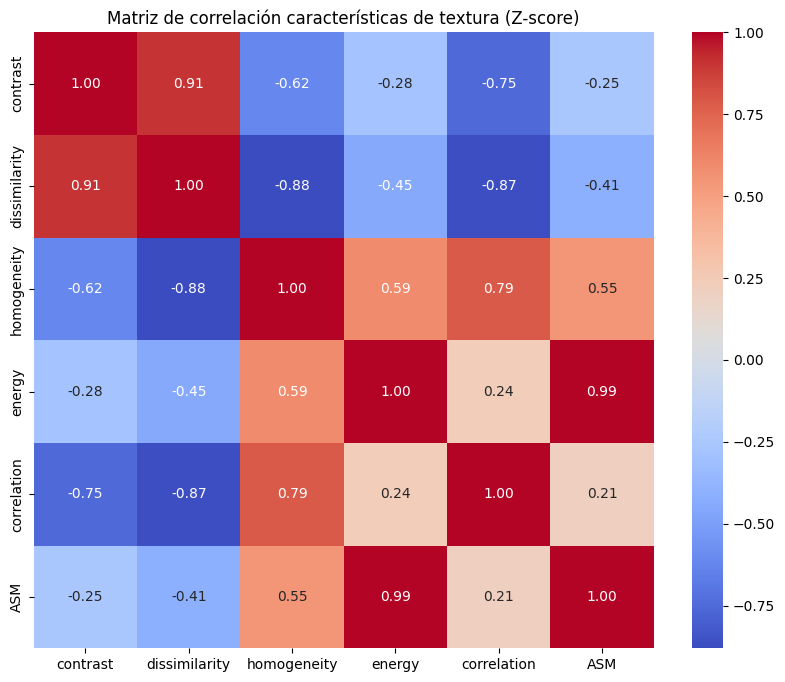

In [ ]:

folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_textura_z = pd.read_csv(os.path.join(folder_path, "features_glcm_all_zscore.csv"))

# Eliminar columnas no numéricas
df_textura_z_cl = df_textura_z.drop(columns=['filename', 'label'])

# Calcular matriz de correlación
corr_matrix = df_textura_z_cl.corr()

# Mostrar la matriz por consola
print(corr_matrix)

# Visualizar con mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación características de textura (Z-score)")
plt.show()


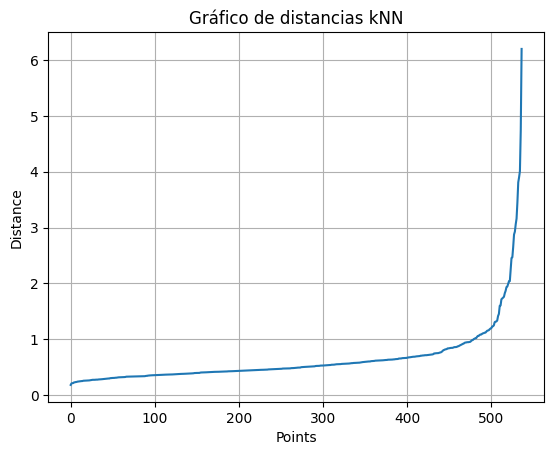

In [6]:
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_textura_z_cl)
distances, indices = neighbors_fit.kneighbors(df_textura_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()


In [7]:
X_textura_z = np.array(df_textura_z_cl)

clustering = DBSCAN(eps=0.66, min_samples=4).fit(X_textura_z) #0.7, 0.6,0.56           #4 

clustering.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1, -1,  0, -1, -1,  1,  0, -1,  0,  0,  1,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0, -1,  0

In [8]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 81


In [9]:
y_true = df_textura_z['label'] 
y_pred = clustering.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN  -1    0   1   2
Etiqueta Real                  
higher           9  255   0   4
smaller         72  192   5   0


In [10]:
# Elimina puntos de ruido 
mask = y_pred != -1
if len(set(y_pred[mask])) > 1:
    silhouette = silhouette_score(X_textura_z[mask], y_pred[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters para calcular la Silhouette (se necesita al menos 2).")


Silhouette Score (sin ruido): 0.312


Está muy desequilibrado, todos los puntos en un solo cluster y muchos puntos sin asignar a cluster.

Sle ruido y todos los puntos en un solo cluster

In [11]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model = umap.UMAP(n_neighbors=9, n_components=2,min_dist=0.01, random_state=42)  
X_umap = umap_model.fit_transform(X_textura_z)


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_28320\2629678783.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


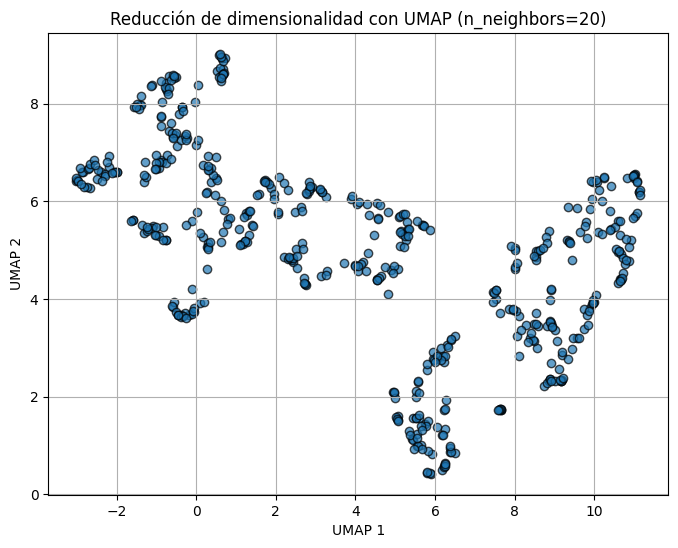

In [12]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP (n_neighbors=20)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()


In [13]:
clustering_umap_z = DBSCAN(eps=1.5, min_samples=9).fit(X_umap)
clustering_umap_z.labels_

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [15]:
y_true = df_textura_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher          173   95
smaller          64  205


In [16]:

mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")


Silhouette Score (sin ruido): 0.571


Ahora si que se consigue que se encuentren las imágenes smaller y higher en su mayoría repartidas en dos clusteres.

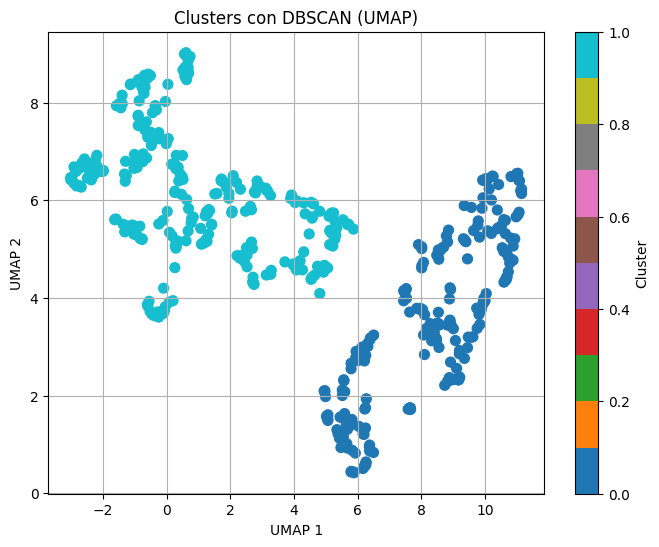

In [17]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

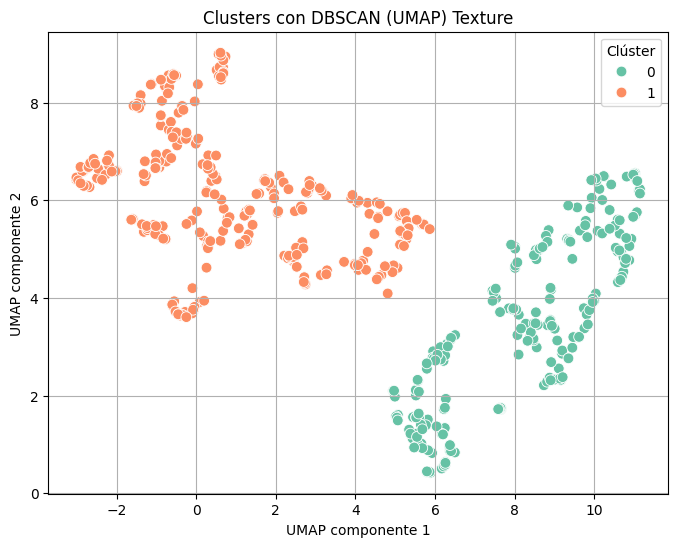

In [18]:
df_plot = pd.DataFrame({
    'UMAP 1': X_umap[:, 0],
    'UMAP 2': X_umap[:, 1],
    'Cluster': labels.astype(str) 
})

# Visualización con seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_plot,
    x='UMAP 1',
    y='UMAP 2',
    hue='Cluster',
    palette='Set2',
    s=60,
    edgecolor='white',
    alpha=1,
    legend='full'
)

plt.title("Clusters con DBSCAN (UMAP) Texture")
plt.xlabel("UMAP componente 1")
plt.ylabel("UMAP componente 2")
plt.grid(True)
plt.legend(title='Clúster')
plt.show()

se hace lo mismo pero con la normalización min-max

In [19]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_textura_mm_cl= df_textura_mm.drop(columns=['filename', 'label'])

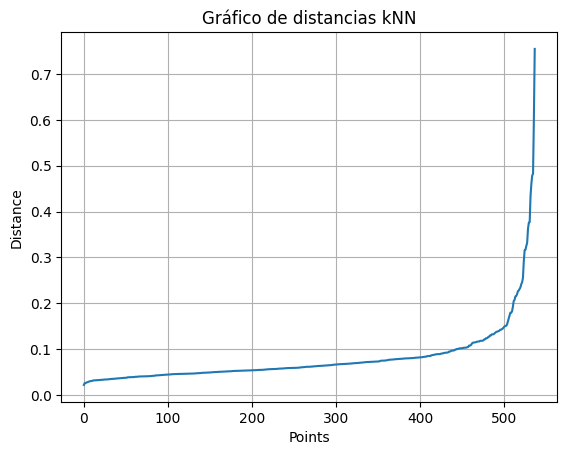

In [20]:
k = 5
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_textura_mm_cl)
distances, indices = neighbors_fit.kneighbors(df_textura_mm_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()

In [21]:
X_textura_mm = np.array(df_textura_mm_cl)

clustering_mm = DBSCAN(eps=0.19, min_samples=7).fit(X_textura_mm)

clustering.labels_

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0, -1,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,
       -1,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0, -1, -1,  0, -1, -1,  1,  0, -1,  0,  0,  1,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0, -1,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0, -1, -1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1, -1,
       -1,  0,  0, -1,  0

In [22]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors=9, n_components=2,min_dist=0.01, random_state=42)  
X_umap_mm = umap_model_mm.fit_transform(X_textura_mm)


c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_28320\3564600941.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


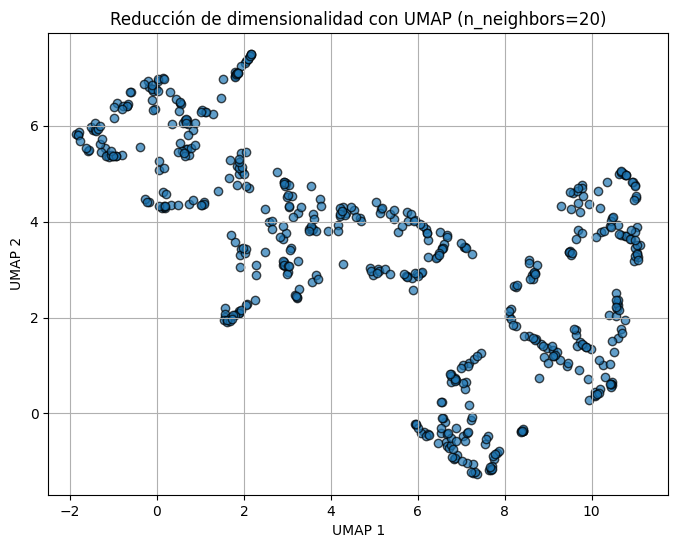

In [23]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP (n_neighbors=20)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()  

In [24]:
clustering_umap_mm = DBSCAN(eps=1, min_samples=9).fit(X_umap_mm)
clustering_umap_mm.labels_

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
labels = clustering_umap_mm.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 2
Número de puntos de ruido: 0


In [26]:
y_true = df_textura_mm['label'] 
y_pred = clustering_umap_mm.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN    0    1
Etiqueta Real           
higher          173   95
smaller          61  208


El 64.55% de las imágenes higher están en el cluster 0 y el 77.32% de las imágenes small están en el cluster 1

In [27]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.547


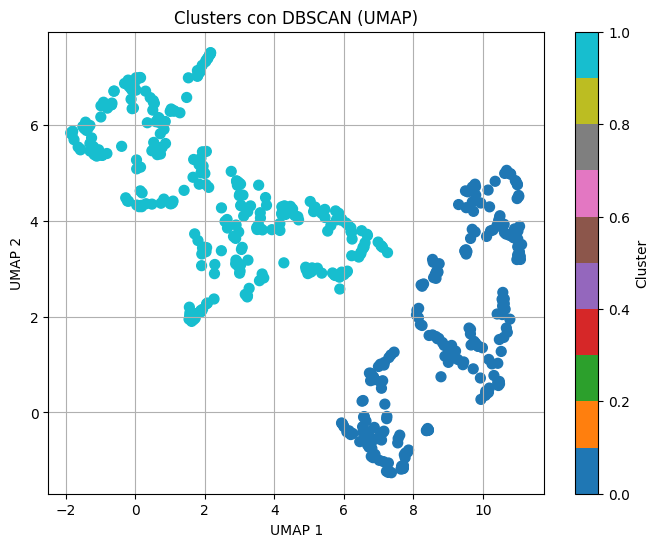

In [28]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()